In [12]:
from tqdm import tqdm

In [153]:
import matplotlib.pyplot as plt 

In [1]:
import requests
import pandas as pd
import numpy as np

r = requests.get('https://malegislature.gov/api/Documents', verify=False)
r.raise_for_status()
documents =r.json()


/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
pwd

'/Users/canerozer/Desktop/BU/SPRING2024/CS549/CS549_MAPLE/documents'

In [3]:
len(documents)

8293

In [4]:
documents[0].keys()

dict_keys(['BillNumber', 'DocketNumber', 'Title', 'PrimarySponsor', 'Cosponsors', 'JointSponsor', 'GeneralCourtNumber', 'Details', 'IsDocketBookOnly'])

In [5]:
documents[0]

{'BillNumber': None,
 'DocketNumber': 'HD249',
 'Title': "An Act relative to access to a decedent's electronic mail accounts",
 'PrimarySponsor': {'Id': 'JNR1',
  'Name': 'Jeffrey N. Roy',
  'Type': 1,
  'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/JNR1',
  'ResponseDate': '2023-01-04T10:19:47.73'},
 'Cosponsors': [{'Id': 'JNR1',
   'Name': 'Jeffrey N. Roy',
   'Type': 1,
   'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/JNR1',
   'ResponseDate': '2023-01-04T10:19:47.73'}],
 'JointSponsor': None,
 'GeneralCourtNumber': 193,
 'Details': None,
 'IsDocketBookOnly': True}

In [6]:
documents_with_billnumber=[doc for doc in documents if doc['BillNumber'] != None]
documents_with_billnumber[0]

{'BillNumber': 'H1',
 'DocketNumber': 'HD1',
 'Title': 'An Act making appropriations for the Fiscal Year 2024 for the maintenance of the departments, boards, commissions, institutions, and certain activities of the Commonwealth, for interest, sinking fund, and serial bond requirements, and for certain permanent improvements',
 'PrimarySponsor': {'Id': 'GOV7',
  'Name': 'Maura T. Healey',
  'Type': 1,
  'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/GOV7',
  'ResponseDate': '2023-03-01T15:21:54.853'},
 'Cosponsors': [],
 'JointSponsor': None,
 'GeneralCourtNumber': 193,
 'Details': 'http://malegislature.gov/api/GeneralCourts/193/Documents/H1',
 'IsDocketBookOnly': False}

In [7]:
len(documents_with_billnumber)

7116

In [8]:
billnumbers= [doc['BillNumber'] for doc in documents_with_billnumber]

In [9]:
def get_documents(billnumber):
    
    r = requests.get(f'https://malegislature.gov/api/Documents/{billnumber}', verify=False)
    r = r.json()
  
    all_fields = ["Title", "BillNumber", "DocketNumber", "GeneralCourtNumber", 
                  "PrimarySponsor", "Cosponsors", "JointSponsor", "BillHistory", 
                  "LegislationTypeName", "Pinslip", "DocumentText", "EmergencyPreamble", 
                  "RollCalls", "Attachments", "CommitteeRecommendations", "Amendments"]
    
    
    fields = {}
    
    for field in all_fields:
        fields[field] = r.get(field, np.nan)
        
    return fields
        
    
    

In [13]:
final_attributes=[get_documents(billnum) for billnum in tqdm(billnumbers)]

  0%|                                                  | 0/7116 [00:00<?, ?it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  0%|                                       | 1/7116 [00:07<14:01:56,  7.10s/it]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  0%|                                        | 2/7116 [00:07<6:10:43,  3.13s/it]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  0%|                                         | 20/7116 [00:13<30:37,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  0%|                                         | 21/7116 [00:13<30:25,  3.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  0%|▏                                        | 22/7116 [00:14<30:34,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  1%|▏                                        | 40/7116 [00:19<34:37,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▏                                        | 41/7116 [00:19<33:08,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▏                                        | 42/7116 [00:19<33:02,  3.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  1%|▎                                        | 60/7116 [00:24<28:34,  4.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▎                                        | 61/7116 [00:24<30:55,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▎                                        | 62/7116 [00:24<27:49,  4.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  1%|▍                                        | 80/7116 [00:31<38:13,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▍                                        | 81/7116 [00:32<38:54,  3.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▍                                        | 82/7116 [00:32<42:04,  2.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  1%|▌                                       | 100/7116 [00:39<39:57,  2.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▌                                       | 101/7116 [00:39<45:07,  2.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  1%|▌                                       | 102/7116 [00:39<39:18,  2.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  2%|▋                                     | 120/7116 [00:48<1:14:24,  1.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▋                                     | 121/7116 [00:48<1:15:47,  1.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▋                                     | 122/7116 [00:49<1:02:00,  1.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  2%|▊                                       | 140/7116 [00:55<44:20,  2.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▊                                       | 141/7116 [00:55<45:23,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▊                                       | 142/7116 [00:55<40:06,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  2%|▉                                       | 160/7116 [01:00<31:16,  3.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▉                                       | 161/7116 [01:00<28:03,  4.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  2%|▉                                       | 162/7116 [01:01<29:11,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  3%|█                                       | 180/7116 [01:06<43:09,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█                                       | 181/7116 [01:07<43:11,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█                                       | 182/7116 [01:07<45:18,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  3%|█                                       | 200/7116 [01:13<44:38,  2.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▏                                      | 201/7116 [01:13<36:56,  3.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▏                                      | 202/7116 [01:13<34:16,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  3%|█▏                                      | 220/7116 [01:19<49:38,  2.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▏                                      | 221/7116 [01:20<48:57,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▏                                      | 222/7116 [01:20<41:03,  2.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  3%|█▎                                      | 240/7116 [01:28<59:20,  1.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▎                                      | 241/7116 [01:28<51:42,  2.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  3%|█▎                                      | 242/7116 [01:29<56:51,  2.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  4%|█▍                                      | 260/7116 [01:35<38:29,  2.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▍                                      | 261/7116 [01:35<37:44,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▍                                      | 262/7116 [01:36<45:13,  2.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  4%|█▌                                      | 280/7116 [01:42<30:57,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▌                                      | 281/7116 [01:42<42:29,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▌                                      | 282/7116 [01:43<51:21,  2.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  4%|█▋                                      | 300/7116 [01:50<42:33,  2.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▋                                      | 301/7116 [01:50<37:08,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  4%|█▋                                      | 302/7116 [01:50<33:20,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  4%|█▊                                      | 320/7116 [01:56<36:43,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|█▊                                      | 321/7116 [01:56<36:06,  3.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|█▊                                      | 322/7116 [01:57<33:22,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  5%|█▉                                      | 340/7116 [02:02<28:24,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|█▉                                      | 341/7116 [02:02<36:34,  3.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|█▉                                      | 342/7116 [02:03<36:44,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  5%|██                                      | 360/7116 [02:08<30:54,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|██                                      | 361/7116 [02:09<28:22,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|██                                      | 362/7116 [02:09<26:30,  4.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  5%|██▏                                     | 380/7116 [02:13<26:15,  4.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|██▏                                     | 381/7116 [02:13<24:59,  4.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  5%|██▏                                     | 382/7116 [02:13<25:57,  4.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  6%|██▏                                     | 400/7116 [02:18<24:12,  4.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▎                                     | 401/7116 [02:19<25:21,  4.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▎                                     | 402/7116 [02:19<25:08,  4.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  6%|██▎                                     | 420/7116 [02:24<34:46,  3.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▎                                     | 421/7116 [02:24<32:55,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▎                                     | 422/7116 [02:24<29:30,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  6%|██▍                                     | 440/7116 [02:30<43:34,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▍                                     | 441/7116 [02:30<36:26,  3.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▍                                     | 442/7116 [02:30<35:11,  3.16it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  6%|██▌                                     | 460/7116 [02:36<28:36,  3.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▌                                     | 461/7116 [02:37<36:09,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  6%|██▌                                     | 462/7116 [02:37<32:17,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  7%|██▋                                     | 480/7116 [02:42<26:16,  4.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▋                                     | 481/7116 [02:42<26:11,  4.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▋                                     | 482/7116 [02:42<27:46,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  7%|██▊                                     | 500/7116 [02:48<29:45,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▊                                     | 501/7116 [02:48<28:58,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▊                                     | 502/7116 [02:49<29:31,  3.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  7%|██▉                                     | 520/7116 [02:54<38:19,  2.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▉                                     | 521/7116 [02:54<33:53,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  7%|██▉                                     | 522/7116 [02:55<36:17,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  8%|███                                     | 540/7116 [03:01<34:30,  3.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███                                     | 541/7116 [03:01<31:24,  3.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███                                     | 542/7116 [03:02<30:21,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  8%|███▏                                    | 560/7116 [03:07<28:13,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▏                                    | 561/7116 [03:07<27:05,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▏                                    | 562/7116 [03:07<25:41,  4.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  8%|███▎                                    | 580/7116 [03:12<26:52,  4.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▎                                    | 581/7116 [03:12<27:14,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▎                                    | 582/7116 [03:13<28:46,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  8%|███▎                                    | 600/7116 [03:17<25:21,  4.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▍                                    | 601/7116 [03:18<25:19,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  8%|███▍                                    | 602/7116 [03:18<24:06,  4.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  9%|███▍                                    | 620/7116 [03:26<58:40,  1.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▍                                    | 621/7116 [03:26<49:33,  2.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▍                                    | 622/7116 [03:26<41:08,  2.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  9%|███▌                                    | 640/7116 [03:33<41:44,  2.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▌                                    | 641/7116 [03:33<36:33,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▌                                    | 642/7116 [03:33<34:43,  3.11it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

  9%|███▋                                    | 660/7116 [03:38<26:31,  4.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▋                                    | 661/7116 [03:38<26:43,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
  9%|███▋                                    | 662/7116 [03:38<26:02,  4.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 10%|███▊                                    | 680/7116 [03:47<51:03,  2.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|███▊                                    | 681/7116 [03:47<45:19,  2.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|███▊                                    | 682/7116 [03:47<45:16,  2.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 10%|███▉                                    | 700/7116 [03:54<50:18,  2.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|███▉                                    | 701/7116 [03:55<49:53,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|███▉                                    | 702/7116 [03:55<41:49,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 10%|████                                    | 720/7116 [04:01<45:16,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|████                                    | 721/7116 [04:02<51:18,  2.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|████                                    | 722/7116 [04:02<51:12,  2.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 10%|████▏                                   | 740/7116 [04:11<55:52,  1.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|████▏                                   | 741/7116 [04:12<48:36,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 10%|████▏                                   | 742/7116 [04:12<50:04,  2.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 11%|████▎                                   | 760/7116 [04:19<29:18,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▎                                   | 761/7116 [04:19<27:21,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▎                                   | 762/7116 [04:20<31:23,  3.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 11%|████▍                                   | 780/7116 [04:26<36:21,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▍                                   | 781/7116 [04:27<36:20,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▍                                   | 782/7116 [04:27<35:13,  3.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 11%|████▍                                   | 800/7116 [04:33<39:48,  2.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▌                                   | 801/7116 [04:33<34:22,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 11%|████▌                                   | 802/7116 [04:34<33:18,  3.16it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 12%|████▌                                   | 820/7116 [04:39<33:35,  3.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▌                                   | 821/7116 [04:40<29:34,  3.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▌                                   | 822/7116 [04:40<34:12,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 12%|████▋                                   | 840/7116 [04:49<59:31,  1.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▋                                   | 841/7116 [04:49<56:58,  1.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▋                                   | 842/7116 [04:49<47:37,  2.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 12%|████▊                                   | 860/7116 [04:56<38:32,  2.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▊                                   | 861/7116 [04:57<37:26,  2.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▊                                   | 862/7116 [04:57<39:09,  2.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 12%|████▉                                   | 880/7116 [05:05<40:48,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▉                                   | 881/7116 [05:05<40:59,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 12%|████▉                                   | 882/7116 [05:06<39:53,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 13%|█████                                   | 900/7116 [05:14<55:12,  1.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████                                   | 901/7116 [05:15<51:26,  2.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████                                   | 902/7116 [05:15<48:39,  2.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 13%|█████▏                                  | 920/7116 [05:21<34:57,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████▏                                  | 921/7116 [05:22<40:16,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████▏                                  | 922/7116 [05:22<41:16,  2.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 13%|█████▎                                  | 940/7116 [05:30<40:54,  2.52it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████▎                                  | 941/7116 [05:30<43:35,  2.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 13%|█████▎                                  | 942/7116 [05:30<39:38,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 13%|█████▍                                  | 960/7116 [05:36<26:06,  3.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▍                                  | 961/7116 [05:37<28:34,  3.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▍                                  | 962/7116 [05:37<27:47,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 14%|█████▌                                  | 980/7116 [05:42<30:48,  3.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▌                                  | 981/7116 [05:42<31:30,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▌                                  | 982/7116 [05:42<32:11,  3.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 14%|█████▍                                 | 1000/7116 [05:49<30:41,  3.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▍                                 | 1001/7116 [05:50<32:35,  3.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▍                                 | 1002/7116 [05:50<30:10,  3.38it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 14%|█████▌                                 | 1020/7116 [05:55<29:19,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▌                                 | 1021/7116 [05:56<27:06,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█████▌                                 | 1022/7116 [05:56<26:45,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 15%|█████▋                                 | 1040/7116 [06:01<34:57,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▋                                 | 1041/7116 [06:01<39:46,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▋                                 | 1042/7116 [06:02<34:09,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 15%|█████▊                                 | 1060/7116 [06:08<34:54,  2.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▊                                 | 1061/7116 [06:08<39:55,  2.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▊                                 | 1062/7116 [06:09<40:14,  2.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 15%|█████▉                                 | 1080/7116 [06:15<38:51,  2.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▉                                 | 1081/7116 [06:16<42:57,  2.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|█████▉                                 | 1082/7116 [06:16<40:21,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 15%|██████                                 | 1100/7116 [06:23<28:08,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|██████                                 | 1101/7116 [06:23<25:05,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 15%|██████                                 | 1102/7116 [06:23<23:20,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 16%|██████▏                                | 1120/7116 [06:30<44:24,  2.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▏                                | 1121/7116 [06:30<40:04,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▏                                | 1122/7116 [06:31<43:17,  2.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 16%|██████▏                                | 1140/7116 [06:36<51:08,  1.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▎                                | 1141/7116 [06:37<44:04,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▎                                | 1142/7116 [06:37<44:40,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 16%|██████▎                                | 1160/7116 [06:43<35:15,  2.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▎                                | 1161/7116 [06:43<32:21,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 16%|██████▎                                | 1162/7116 [06:43<33:47,  2.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 17%|██████▍                                | 1180/7116 [06:49<34:44,  2.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▍                                | 1181/7116 [06:49<34:05,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▍                                | 1182/7116 [06:49<38:35,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 17%|██████▌                                | 1200/7116 [06:55<30:30,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▌                                | 1201/7116 [06:56<27:01,  3.65it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▌                                | 1202/7116 [06:56<26:23,  3.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 17%|██████▋                                | 1220/7116 [07:01<25:23,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▋                                | 1221/7116 [07:01<26:11,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▋                                | 1222/7116 [07:02<26:21,  3.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 17%|██████▊                                | 1240/7116 [07:07<29:13,  3.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▊                                | 1241/7116 [07:08<28:12,  3.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 17%|██████▊                                | 1242/7116 [07:08<33:34,  2.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 18%|██████▉                                | 1260/7116 [07:14<32:02,  3.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|██████▉                                | 1261/7116 [07:14<27:55,  3.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|██████▉                                | 1262/7116 [07:14<26:20,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 18%|███████                                | 1280/7116 [07:20<27:24,  3.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|███████                                | 1281/7116 [07:20<24:56,  3.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|███████                                | 1282/7116 [07:20<26:19,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 18%|███████                                | 1300/7116 [07:25<21:41,  4.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|███████▏                               | 1301/7116 [07:25<20:51,  4.65it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 18%|███████▏                               | 1302/7116 [07:25<25:00,  3.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 19%|███████▏                               | 1320/7116 [07:30<32:06,  3.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▏                               | 1321/7116 [07:31<37:18,  2.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▏                               | 1322/7116 [07:31<32:49,  2.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 19%|███████▎                               | 1340/7116 [07:36<28:13,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▎                               | 1341/7116 [07:36<28:39,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▎                               | 1342/7116 [07:36<25:45,  3.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 19%|███████▍                               | 1360/7116 [07:40<20:40,  4.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▍                               | 1361/7116 [07:40<20:31,  4.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▍                               | 1362/7116 [07:41<24:22,  3.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 19%|███████▌                               | 1380/7116 [07:45<27:29,  3.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▌                               | 1381/7116 [07:46<31:25,  3.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 19%|███████▌                               | 1382/7116 [07:46<28:27,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 20%|███████▋                               | 1400/7116 [07:51<25:25,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▋                               | 1401/7116 [07:51<23:11,  4.11it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▋                               | 1402/7116 [07:51<25:42,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 20%|███████▊                               | 1420/7116 [07:57<24:58,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▊                               | 1421/7116 [07:58<23:51,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▊                               | 1422/7116 [07:58<25:05,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 20%|███████▉                               | 1440/7116 [08:03<24:24,  3.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▉                               | 1441/7116 [08:04<25:16,  3.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 20%|███████▉                               | 1442/7116 [08:04<29:55,  3.16it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 21%|████████                               | 1460/7116 [08:10<28:43,  3.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████                               | 1461/7116 [08:11<26:08,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████                               | 1462/7116 [08:11<26:20,  3.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 21%|████████                               | 1480/7116 [08:19<26:22,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████                               | 1481/7116 [08:19<31:51,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████                               | 1482/7116 [08:19<27:37,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 21%|████████▏                              | 1500/7116 [08:24<22:09,  4.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████▏                              | 1501/7116 [08:24<27:32,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████▏                              | 1502/7116 [08:25<29:00,  3.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 21%|████████▎                              | 1520/7116 [08:30<31:38,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████▎                              | 1521/7116 [08:30<28:32,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 21%|████████▎                              | 1522/7116 [08:31<26:57,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 22%|████████▍                              | 1540/7116 [08:36<28:49,  3.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▍                              | 1541/7116 [08:37<25:14,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▍                              | 1542/7116 [08:37<30:40,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 22%|████████▌                              | 1560/7116 [08:43<24:54,  3.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▌                              | 1561/7116 [08:43<25:00,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▌                              | 1562/7116 [08:44<28:10,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 22%|████████▋                              | 1580/7116 [08:51<25:39,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▋                              | 1581/7116 [08:51<23:48,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▋                              | 1582/7116 [08:51<22:51,  4.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 22%|████████▊                              | 1600/7116 [08:58<29:37,  3.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 22%|████████▊                              | 1601/7116 [08:58<33:08,  2.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|████████▊                              | 1602/7116 [08:59<37:28,  2.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 23%|████████▉                              | 1620/7116 [09:05<29:56,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|████████▉                              | 1621/7116 [09:05<29:50,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|████████▉                              | 1622/7116 [09:05<30:58,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 23%|████████▉                              | 1640/7116 [09:12<36:24,  2.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|████████▉                              | 1641/7116 [09:12<31:33,  2.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|████████▉                              | 1642/7116 [09:13<28:43,  3.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 23%|█████████                              | 1660/7116 [09:19<28:01,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|█████████                              | 1661/7116 [09:19<25:15,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 23%|█████████                              | 1662/7116 [09:19<26:28,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 24%|█████████▏                             | 1680/7116 [09:25<32:57,  2.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▏                             | 1681/7116 [09:26<34:29,  2.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▏                             | 1682/7116 [09:26<35:07,  2.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 24%|█████████▎                             | 1700/7116 [09:31<27:19,  3.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▎                             | 1701/7116 [09:32<27:21,  3.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▎                             | 1702/7116 [09:32<32:36,  2.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 24%|█████████▍                             | 1720/7116 [09:38<39:50,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▍                             | 1721/7116 [09:38<39:03,  2.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▍                             | 1722/7116 [09:39<39:49,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 24%|█████████▌                             | 1740/7116 [09:46<33:25,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▌                             | 1741/7116 [09:46<30:38,  2.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 24%|█████████▌                             | 1742/7116 [09:47<29:27,  3.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 25%|█████████▋                             | 1760/7116 [09:53<29:53,  2.99it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▋                             | 1761/7116 [09:54<38:00,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▋                             | 1762/7116 [09:54<40:01,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 25%|█████████▊                             | 1780/7116 [10:02<41:13,  2.16it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▊                             | 1781/7116 [10:02<39:49,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▊                             | 1782/7116 [10:03<41:27,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 25%|█████████▊                             | 1800/7116 [10:10<24:18,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▊                             | 1801/7116 [10:10<27:54,  3.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 25%|█████████▉                             | 1802/7116 [10:10<26:27,  3.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 26%|█████████▉                             | 1820/7116 [10:15<23:50,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|█████████▉                             | 1821/7116 [10:15<25:55,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|█████████▉                             | 1822/7116 [10:16<27:03,  3.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 26%|██████████                             | 1840/7116 [10:21<26:19,  3.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████                             | 1841/7116 [10:21<24:07,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████                             | 1842/7116 [10:22<29:47,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 26%|██████████▏                            | 1860/7116 [10:28<28:36,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████▏                            | 1861/7116 [10:28<25:34,  3.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████▏                            | 1862/7116 [10:29<23:02,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 26%|██████████▎                            | 1880/7116 [10:34<23:43,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████▎                            | 1881/7116 [10:34<21:47,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 26%|██████████▎                            | 1882/7116 [10:34<23:02,  3.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 27%|██████████▍                            | 1900/7116 [10:39<27:16,  3.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▍                            | 1901/7116 [10:40<26:58,  3.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▍                            | 1902/7116 [10:40<31:04,  2.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 27%|██████████▌                            | 1920/7116 [10:45<18:33,  4.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▌                            | 1921/7116 [10:45<19:54,  4.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▌                            | 1922/7116 [10:45<20:55,  4.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 27%|██████████▋                            | 1940/7116 [10:50<29:37,  2.91it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▋                            | 1941/7116 [10:52<58:59,  1.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 27%|██████████▋                            | 1942/7116 [10:52<53:18,  1.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 28%|██████████▋                            | 1960/7116 [10:58<20:00,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▋                            | 1961/7116 [10:58<19:05,  4.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▊                            | 1962/7116 [10:58<19:33,  4.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 28%|██████████▊                            | 1980/7116 [11:04<26:00,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▊                            | 1981/7116 [11:04<27:35,  3.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▊                            | 1982/7116 [11:04<29:31,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 28%|██████████▉                            | 2000/7116 [11:10<24:05,  3.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▉                            | 2001/7116 [11:10<22:26,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|██████████▉                            | 2002/7116 [11:11<22:29,  3.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 28%|███████████                            | 2020/7116 [11:15<19:02,  4.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|███████████                            | 2021/7116 [11:16<19:41,  4.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 28%|███████████                            | 2022/7116 [11:16<19:04,  4.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 29%|███████████▏                           | 2040/7116 [11:20<21:53,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▏                           | 2041/7116 [11:20<21:53,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▏                           | 2042/7116 [11:21<20:06,  4.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 29%|███████████▎                           | 2060/7116 [11:26<24:34,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▎                           | 2061/7116 [11:26<22:48,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▎                           | 2062/7116 [11:27<25:45,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 29%|███████████▍                           | 2080/7116 [11:32<20:38,  4.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▍                           | 2081/7116 [11:32<27:44,  3.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 29%|███████████▍                           | 2082/7116 [11:33<25:31,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 30%|███████████▌                           | 2100/7116 [11:37<19:27,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▌                           | 2101/7116 [11:38<21:24,  3.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▌                           | 2102/7116 [11:38<22:29,  3.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 30%|███████████▌                           | 2120/7116 [11:42<15:45,  5.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▌                           | 2121/7116 [11:42<15:51,  5.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▋                           | 2122/7116 [11:42<17:29,  4.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 30%|███████████▋                           | 2140/7116 [11:49<29:03,  2.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▋                           | 2141/7116 [11:49<30:30,  2.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▋                           | 2142/7116 [11:50<31:31,  2.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 30%|███████████▊                           | 2160/7116 [11:57<25:22,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▊                           | 2161/7116 [11:57<24:55,  3.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 30%|███████████▊                           | 2162/7116 [11:57<22:41,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 31%|███████████▉                           | 2180/7116 [12:02<22:52,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|███████████▉                           | 2181/7116 [12:02<20:54,  3.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|███████████▉                           | 2182/7116 [12:02<20:31,  4.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 31%|████████████                           | 2200/7116 [12:07<18:20,  4.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|████████████                           | 2201/7116 [12:07<17:57,  4.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|████████████                           | 2202/7116 [12:08<20:08,  4.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 31%|████████████▏                          | 2220/7116 [12:13<22:08,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|████████████▏                          | 2221/7116 [12:13<21:00,  3.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|████████████▏                          | 2222/7116 [12:13<20:52,  3.91it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 31%|████████████▎                          | 2240/7116 [12:19<25:54,  3.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 31%|████████████▎                          | 2241/7116 [12:19<27:18,  2.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▎                          | 2242/7116 [12:19<24:51,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 32%|████████████▍                          | 2260/7116 [12:24<22:22,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▍                          | 2261/7116 [12:25<22:54,  3.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▍                          | 2262/7116 [12:25<24:44,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 32%|████████████▍                          | 2280/7116 [12:31<34:14,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▌                          | 2281/7116 [12:32<37:14,  2.16it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▌                          | 2282/7116 [12:32<34:30,  2.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 32%|████████████▌                          | 2300/7116 [12:41<31:43,  2.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▌                          | 2301/7116 [12:42<35:21,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 32%|████████████▌                          | 2302/7116 [12:42<34:15,  2.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 33%|████████████▋                          | 2320/7116 [12:47<21:14,  3.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▋                          | 2321/7116 [12:47<22:41,  3.52it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▋                          | 2322/7116 [12:48<25:20,  3.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 33%|████████████▊                          | 2340/7116 [12:54<25:50,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▊                          | 2341/7116 [12:54<23:18,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▊                          | 2342/7116 [12:55<30:38,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 33%|████████████▉                          | 2360/7116 [13:01<21:52,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▉                          | 2361/7116 [13:01<23:00,  3.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|████████████▉                          | 2362/7116 [13:01<25:43,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 33%|█████████████                          | 2380/7116 [13:06<24:28,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|█████████████                          | 2381/7116 [13:06<28:54,  2.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 33%|█████████████                          | 2382/7116 [13:07<25:59,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 34%|█████████████▏                         | 2400/7116 [13:13<27:12,  2.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▏                         | 2401/7116 [13:13<23:29,  3.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▏                         | 2402/7116 [13:13<21:12,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 34%|█████████████▎                         | 2420/7116 [13:19<21:00,  3.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▎                         | 2421/7116 [13:19<18:54,  4.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▎                         | 2422/7116 [13:20<17:58,  4.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 34%|█████████████▎                         | 2440/7116 [13:24<22:27,  3.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▍                         | 2441/7116 [13:25<25:22,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 34%|█████████████▍                         | 2442/7116 [13:25<26:24,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 35%|█████████████▍                         | 2460/7116 [13:31<22:51,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▍                         | 2461/7116 [13:31<20:20,  3.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▍                         | 2462/7116 [13:31<21:05,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 35%|█████████████▌                         | 2480/7116 [13:36<21:34,  3.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▌                         | 2481/7116 [13:37<26:56,  2.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▌                         | 2482/7116 [13:37<32:06,  2.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 35%|█████████████▋                         | 2500/7116 [13:45<37:26,  2.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▋                         | 2501/7116 [13:45<32:36,  2.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▋                         | 2502/7116 [13:45<27:06,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 35%|█████████████▊                         | 2520/7116 [13:50<18:22,  4.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▊                         | 2521/7116 [13:51<24:04,  3.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 35%|█████████████▊                         | 2522/7116 [13:51<28:17,  2.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 36%|█████████████▉                         | 2540/7116 [13:59<31:32,  2.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|█████████████▉                         | 2541/7116 [14:00<32:01,  2.38it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|█████████████▉                         | 2542/7116 [14:00<33:33,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 36%|██████████████                         | 2560/7116 [14:06<22:07,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|██████████████                         | 2561/7116 [14:06<26:53,  2.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|██████████████                         | 2562/7116 [14:07<23:26,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 36%|██████████████▏                        | 2580/7116 [14:12<19:24,  3.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|██████████████▏                        | 2581/7116 [14:12<18:13,  4.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 36%|██████████████▏                        | 2582/7116 [14:12<20:31,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 37%|██████████████▏                        | 2600/7116 [14:17<22:10,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▎                        | 2601/7116 [14:17<21:18,  3.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▎                        | 2602/7116 [14:17<20:05,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 37%|██████████████▎                        | 2620/7116 [14:22<15:50,  4.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▎                        | 2621/7116 [14:22<17:41,  4.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▎                        | 2622/7116 [14:22<16:43,  4.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 37%|██████████████▍                        | 2640/7116 [14:26<18:39,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▍                        | 2641/7116 [14:27<18:32,  4.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▍                        | 2642/7116 [14:27<17:32,  4.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 37%|██████████████▌                        | 2660/7116 [14:32<19:45,  3.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▌                        | 2661/7116 [14:32<21:25,  3.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 37%|██████████████▌                        | 2662/7116 [14:32<19:17,  3.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 38%|██████████████▋                        | 2680/7116 [14:36<16:42,  4.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▋                        | 2681/7116 [14:37<17:11,  4.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▋                        | 2682/7116 [14:37<16:26,  4.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 38%|██████████████▊                        | 2700/7116 [14:41<23:47,  3.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▊                        | 2701/7116 [14:41<21:40,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▊                        | 2702/7116 [14:42<19:41,  3.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 38%|██████████████▉                        | 2720/7116 [14:47<17:38,  4.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▉                        | 2721/7116 [14:47<21:26,  3.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 38%|██████████████▉                        | 2722/7116 [14:48<26:18,  2.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 39%|███████████████                        | 2740/7116 [14:54<23:46,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████                        | 2741/7116 [14:54<22:45,  3.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████                        | 2742/7116 [14:55<25:45,  2.83it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 39%|███████████████▏                       | 2760/7116 [15:01<26:08,  2.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▏                       | 2761/7116 [15:02<22:33,  3.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▏                       | 2762/7116 [15:02<25:35,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 39%|███████████████▏                       | 2780/7116 [15:06<17:49,  4.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▏                       | 2781/7116 [15:06<17:29,  4.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▏                       | 2782/7116 [15:07<18:11,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 39%|███████████████▎                       | 2800/7116 [15:13<22:09,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▎                       | 2801/7116 [15:13<24:37,  2.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 39%|███████████████▎                       | 2802/7116 [15:14<23:57,  3.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 40%|███████████████▍                       | 2820/7116 [15:18<16:54,  4.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▍                       | 2821/7116 [15:18<19:09,  3.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▍                       | 2822/7116 [15:19<22:01,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 40%|███████████████▌                       | 2840/7116 [15:23<18:55,  3.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▌                       | 2841/7116 [15:23<17:16,  4.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▌                       | 2842/7116 [15:24<16:00,  4.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 40%|███████████████▋                       | 2860/7116 [15:28<18:24,  3.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▋                       | 2861/7116 [15:28<21:28,  3.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▋                       | 2862/7116 [15:29<19:45,  3.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 40%|███████████████▊                       | 2880/7116 [15:32<14:45,  4.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 40%|███████████████▊                       | 2881/7116 [15:33<15:29,  4.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|███████████████▊                       | 2882/7116 [15:33<23:48,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 41%|███████████████▉                       | 2900/7116 [15:41<39:11,  1.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|███████████████▉                       | 2901/7116 [15:41<37:30,  1.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|███████████████▉                       | 2902/7116 [15:42<35:27,  1.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 41%|████████████████                       | 2920/7116 [15:48<20:45,  3.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|████████████████                       | 2921/7116 [15:49<22:35,  3.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|████████████████                       | 2922/7116 [15:49<28:45,  2.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 41%|████████████████                       | 2940/7116 [15:56<23:32,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|████████████████                       | 2941/7116 [15:56<21:30,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 41%|████████████████                       | 2942/7116 [15:57<22:15,  3.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 42%|████████████████▏                      | 2960/7116 [16:02<17:15,  4.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▏                      | 2961/7116 [16:03<17:43,  3.91it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▏                      | 2962/7116 [16:03<17:04,  4.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 42%|████████████████▎                      | 2980/7116 [16:10<26:31,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▎                      | 2981/7116 [16:10<27:16,  2.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▎                      | 2982/7116 [16:11<31:45,  2.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 42%|████████████████▍                      | 3000/7116 [16:18<22:59,  2.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▍                      | 3001/7116 [16:18<20:14,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▍                      | 3002/7116 [16:18<19:31,  3.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 42%|████████████████▌                      | 3020/7116 [16:24<22:26,  3.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▌                      | 3021/7116 [16:24<19:31,  3.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 42%|████████████████▌                      | 3022/7116 [16:24<17:59,  3.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 43%|████████████████▋                      | 3040/7116 [16:32<29:54,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▋                      | 3041/7116 [16:32<31:21,  2.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▋                      | 3042/7116 [16:33<32:23,  2.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 43%|████████████████▊                      | 3060/7116 [16:40<20:39,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▊                      | 3061/7116 [16:40<18:41,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▊                      | 3062/7116 [16:41<16:59,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 43%|████████████████▉                      | 3080/7116 [16:46<23:30,  2.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▉                      | 3081/7116 [16:46<21:19,  3.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 43%|████████████████▉                      | 3082/7116 [16:46<20:35,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 44%|████████████████▉                      | 3100/7116 [16:51<22:28,  2.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|████████████████▉                      | 3101/7116 [16:52<19:29,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████                      | 3102/7116 [16:52<18:33,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 44%|█████████████████                      | 3120/7116 [16:57<17:00,  3.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████                      | 3121/7116 [16:57<19:20,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████                      | 3122/7116 [16:57<18:17,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 44%|█████████████████▏                     | 3140/7116 [17:04<25:34,  2.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████▏                     | 3141/7116 [17:04<26:01,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████▏                     | 3142/7116 [17:05<28:29,  2.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 44%|█████████████████▎                     | 3160/7116 [17:10<19:36,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████▎                     | 3161/7116 [17:11<22:15,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 44%|█████████████████▎                     | 3162/7116 [17:11<25:42,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 45%|█████████████████▍                     | 3180/7116 [17:16<21:26,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▍                     | 3181/7116 [17:16<19:12,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▍                     | 3182/7116 [17:17<19:02,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 45%|█████████████████▌                     | 3200/7116 [17:22<14:52,  4.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▌                     | 3201/7116 [17:22<13:44,  4.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▌                     | 3202/7116 [17:22<13:43,  4.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 45%|█████████████████▋                     | 3220/7116 [17:28<18:02,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▋                     | 3221/7116 [17:29<18:23,  3.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 45%|█████████████████▋                     | 3222/7116 [17:29<16:29,  3.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 46%|█████████████████▊                     | 3240/7116 [17:35<22:09,  2.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▊                     | 3241/7116 [17:36<23:24,  2.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▊                     | 3242/7116 [17:36<24:18,  2.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 46%|█████████████████▊                     | 3260/7116 [17:41<15:13,  4.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▊                     | 3261/7116 [17:42<14:53,  4.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▉                     | 3262/7116 [17:42<17:46,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 46%|█████████████████▉                     | 3280/7116 [17:47<23:12,  2.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▉                     | 3281/7116 [17:47<20:58,  3.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|█████████████████▉                     | 3282/7116 [17:47<17:24,  3.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 46%|██████████████████                     | 3300/7116 [17:52<18:11,  3.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|██████████████████                     | 3301/7116 [17:53<21:21,  2.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 46%|██████████████████                     | 3302/7116 [17:53<25:08,  2.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 47%|██████████████████▏                    | 3320/7116 [17:59<20:12,  3.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▏                    | 3321/7116 [17:59<18:24,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▏                    | 3322/7116 [17:59<20:41,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 47%|██████████████████▎                    | 3340/7116 [18:05<18:49,  3.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▎                    | 3341/7116 [18:05<20:55,  3.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▎                    | 3342/7116 [18:06<22:42,  2.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 47%|██████████████████▍                    | 3360/7116 [18:12<30:29,  2.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▍                    | 3361/7116 [18:13<30:53,  2.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 47%|██████████████████▍                    | 3362/7116 [18:13<27:35,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 47%|██████████████████▌                    | 3380/7116 [18:20<20:23,  3.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▌                    | 3381/7116 [18:21<18:56,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▌                    | 3382/7116 [18:21<16:54,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 48%|██████████████████▋                    | 3400/7116 [18:27<20:53,  2.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▋                    | 3401/7116 [18:28<24:20,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▋                    | 3402/7116 [18:28<23:22,  2.65it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 48%|██████████████████▋                    | 3420/7116 [18:36<26:19,  2.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▋                    | 3421/7116 [18:36<26:36,  2.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▊                    | 3422/7116 [18:37<28:19,  2.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 48%|██████████████████▊                    | 3440/7116 [18:45<36:55,  1.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▊                    | 3441/7116 [18:45<31:33,  1.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 48%|██████████████████▊                    | 3442/7116 [18:46<31:40,  1.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 49%|██████████████████▉                    | 3460/7116 [18:55<23:04,  2.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|██████████████████▉                    | 3461/7116 [18:56<25:37,  2.38it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|██████████████████▉                    | 3462/7116 [18:56<27:36,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 49%|███████████████████                    | 3480/7116 [19:04<29:47,  2.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████                    | 3481/7116 [19:04<30:52,  1.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████                    | 3482/7116 [19:04<26:57,  2.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 49%|███████████████████▏                   | 3500/7116 [19:10<13:49,  4.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████▏                   | 3501/7116 [19:11<14:00,  4.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████▏                   | 3502/7116 [19:11<15:10,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 49%|███████████████████▎                   | 3520/7116 [19:17<15:10,  3.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████▎                   | 3521/7116 [19:17<15:17,  3.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 49%|███████████████████▎                   | 3522/7116 [19:17<13:54,  4.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 50%|███████████████████▍                   | 3540/7116 [19:24<32:52,  1.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▍                   | 3541/7116 [19:24<33:22,  1.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▍                   | 3542/7116 [19:25<30:38,  1.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 50%|███████████████████▌                   | 3560/7116 [19:33<23:34,  2.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▌                   | 3561/7116 [19:34<22:24,  2.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▌                   | 3562/7116 [19:34<27:18,  2.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 50%|███████████████████▌                   | 3580/7116 [19:42<27:47,  2.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▋                   | 3581/7116 [19:42<24:39,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 50%|███████████████████▋                   | 3582/7116 [19:43<24:36,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 51%|███████████████████▋                   | 3600/7116 [19:49<24:25,  2.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▋                   | 3601/7116 [19:49<21:20,  2.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▋                   | 3602/7116 [19:50<18:22,  3.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 51%|███████████████████▊                   | 3620/7116 [19:56<22:21,  2.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▊                   | 3621/7116 [19:56<21:43,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▊                   | 3622/7116 [19:57<23:25,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 51%|███████████████████▉                   | 3640/7116 [20:05<23:48,  2.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▉                   | 3641/7116 [20:05<23:15,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|███████████████████▉                   | 3642/7116 [20:06<21:03,  2.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 51%|████████████████████                   | 3660/7116 [20:12<21:41,  2.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|████████████████████                   | 3661/7116 [20:12<25:52,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 51%|████████████████████                   | 3662/7116 [20:13<25:12,  2.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 52%|████████████████████▏                  | 3680/7116 [20:20<14:52,  3.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▏                  | 3681/7116 [20:21<14:19,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▏                  | 3682/7116 [20:21<14:11,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 52%|████████████████████▎                  | 3700/7116 [20:27<17:20,  3.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▎                  | 3701/7116 [20:28<17:44,  3.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▎                  | 3702/7116 [20:28<15:43,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 52%|████████████████████▍                  | 3720/7116 [20:34<16:51,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▍                  | 3721/7116 [20:34<17:41,  3.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 52%|████████████████████▍                  | 3722/7116 [20:35<16:20,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 53%|████████████████████▍                  | 3740/7116 [20:42<16:34,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▌                  | 3741/7116 [20:42<15:01,  3.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▌                  | 3742/7116 [20:42<20:31,  2.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 53%|████████████████████▌                  | 3760/7116 [20:49<20:39,  2.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▌                  | 3761/7116 [20:50<18:18,  3.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▌                  | 3762/7116 [20:50<15:51,  3.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 53%|████████████████████▋                  | 3780/7116 [20:56<23:48,  2.33it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▋                  | 3781/7116 [20:57<27:05,  2.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▋                  | 3782/7116 [20:58<30:52,  1.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 53%|████████████████████▊                  | 3800/7116 [21:05<23:08,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▊                  | 3801/7116 [21:06<20:38,  2.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 53%|████████████████████▊                  | 3802/7116 [21:06<17:52,  3.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 54%|████████████████████▉                  | 3820/7116 [21:13<28:36,  1.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|████████████████████▉                  | 3821/7116 [21:13<24:09,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|████████████████████▉                  | 3822/7116 [21:13<20:24,  2.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 54%|█████████████████████                  | 3840/7116 [21:19<15:56,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|█████████████████████                  | 3841/7116 [21:19<15:56,  3.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|█████████████████████                  | 3842/7116 [21:20<19:26,  2.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 54%|█████████████████████▏                 | 3860/7116 [21:28<15:45,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|█████████████████████▏                 | 3861/7116 [21:28<15:01,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 54%|█████████████████████▏                 | 3862/7116 [21:29<16:29,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 55%|█████████████████████▎                 | 3880/7116 [21:36<22:15,  2.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▎                 | 3881/7116 [21:36<22:31,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▎                 | 3882/7116 [21:36<19:36,  2.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 55%|█████████████████████▎                 | 3900/7116 [21:41<11:58,  4.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▍                 | 3901/7116 [21:42<11:47,  4.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▍                 | 3902/7116 [21:42<15:38,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 55%|█████████████████████▍                 | 3920/7116 [21:48<16:19,  3.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▍                 | 3921/7116 [21:48<16:45,  3.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▍                 | 3922/7116 [21:48<16:36,  3.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 55%|█████████████████████▌                 | 3940/7116 [21:54<24:09,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▌                 | 3941/7116 [21:55<20:50,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 55%|█████████████████████▌                 | 3942/7116 [21:55<19:17,  2.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 56%|█████████████████████▋                 | 3960/7116 [22:00<16:15,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▋                 | 3961/7116 [22:01<18:12,  2.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▋                 | 3962/7116 [22:01<19:26,  2.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 56%|█████████████████████▊                 | 3980/7116 [22:06<10:36,  4.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▊                 | 3981/7116 [22:07<10:09,  5.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▊                 | 3982/7116 [22:07<10:39,  4.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 56%|█████████████████████▉                 | 4000/7116 [22:13<18:59,  2.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▉                 | 4001/7116 [22:13<17:19,  3.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 56%|█████████████████████▉                 | 4002/7116 [22:13<19:50,  2.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 56%|██████████████████████                 | 4020/7116 [22:19<15:30,  3.33it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████                 | 4021/7116 [22:19<18:07,  2.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████                 | 4022/7116 [22:20<15:49,  3.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 57%|██████████████████████▏                | 4040/7116 [22:24<11:37,  4.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▏                | 4041/7116 [22:24<15:58,  3.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▏                | 4042/7116 [22:24<14:49,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 57%|██████████████████████▎                | 4060/7116 [22:30<21:02,  2.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▎                | 4061/7116 [22:31<23:50,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▎                | 4062/7116 [22:31<24:27,  2.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 57%|██████████████████████▎                | 4080/7116 [22:40<21:27,  2.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▎                | 4081/7116 [22:40<18:22,  2.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 57%|██████████████████████▎                | 4082/7116 [22:40<15:52,  3.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 58%|██████████████████████▍                | 4100/7116 [22:47<21:15,  2.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▍                | 4101/7116 [22:47<22:30,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▍                | 4102/7116 [22:48<23:26,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 58%|██████████████████████▌                | 4120/7116 [22:55<22:44,  2.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▌                | 4121/7116 [22:56<24:09,  2.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▌                | 4122/7116 [22:56<20:07,  2.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 58%|██████████████████████▋                | 4140/7116 [23:04<20:54,  2.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▋                | 4141/7116 [23:04<23:39,  2.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▋                | 4142/7116 [23:05<19:18,  2.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 58%|██████████████████████▊                | 4160/7116 [23:12<24:57,  1.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▊                | 4161/7116 [23:12<21:21,  2.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 58%|██████████████████████▊                | 4162/7116 [23:12<20:05,  2.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 59%|██████████████████████▉                | 4180/7116 [23:19<19:06,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|██████████████████████▉                | 4181/7116 [23:19<17:04,  2.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|██████████████████████▉                | 4182/7116 [23:19<15:34,  3.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 59%|███████████████████████                | 4200/7116 [23:27<21:23,  2.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|███████████████████████                | 4201/7116 [23:27<17:53,  2.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|███████████████████████                | 4202/7116 [23:28<21:53,  2.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 59%|███████████████████████▏               | 4220/7116 [23:35<18:52,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|███████████████████████▏               | 4221/7116 [23:35<21:23,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 59%|███████████████████████▏               | 4222/7116 [23:36<25:37,  1.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 60%|███████████████████████▏               | 4240/7116 [23:41<09:52,  4.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▏               | 4241/7116 [23:41<10:07,  4.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▏               | 4242/7116 [23:42<10:06,  4.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 60%|███████████████████████▎               | 4260/7116 [23:47<11:12,  4.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▎               | 4261/7116 [23:47<10:19,  4.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▎               | 4262/7116 [23:47<11:27,  4.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 60%|███████████████████████▍               | 4280/7116 [23:52<15:01,  3.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▍               | 4281/7116 [23:52<13:32,  3.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▍               | 4282/7116 [23:52<13:19,  3.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 60%|███████████████████████▌               | 4300/7116 [23:58<13:59,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▌               | 4301/7116 [23:58<14:11,  3.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 60%|███████████████████████▌               | 4302/7116 [23:58<14:32,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 61%|███████████████████████▋               | 4320/7116 [24:04<18:19,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▋               | 4321/7116 [24:05<16:37,  2.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▋               | 4322/7116 [24:05<16:38,  2.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 61%|███████████████████████▊               | 4340/7116 [24:12<20:09,  2.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▊               | 4341/7116 [24:12<18:07,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▊               | 4342/7116 [24:12<16:31,  2.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 61%|███████████████████████▉               | 4360/7116 [24:19<17:04,  2.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▉               | 4361/7116 [24:19<14:53,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|███████████████████████▉               | 4362/7116 [24:19<14:27,  3.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 62%|████████████████████████               | 4380/7116 [24:24<12:38,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████               | 4381/7116 [24:25<11:49,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████               | 4382/7116 [24:25<17:03,  2.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 62%|████████████████████████               | 4400/7116 [24:30<13:41,  3.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████               | 4401/7116 [24:31<11:51,  3.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████▏              | 4402/7116 [24:31<13:55,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 62%|████████████████████████▏              | 4420/7116 [24:38<20:17,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████▏              | 4421/7116 [24:39<21:39,  2.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████▏              | 4422/7116 [24:39<19:14,  2.33it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 62%|████████████████████████▎              | 4440/7116 [24:47<19:09,  2.33it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████▎              | 4441/7116 [24:47<19:57,  2.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 62%|████████████████████████▎              | 4442/7116 [24:48<21:11,  2.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 63%|████████████████████████▍              | 4460/7116 [24:57<19:17,  2.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▍              | 4461/7116 [24:57<20:57,  2.11it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▍              | 4462/7116 [24:58<20:08,  2.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 63%|████████████████████████▌              | 4480/7116 [25:04<16:54,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▌              | 4481/7116 [25:05<16:28,  2.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▌              | 4482/7116 [25:05<17:28,  2.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 63%|████████████████████████▋              | 4500/7116 [25:12<17:50,  2.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▋              | 4501/7116 [25:12<19:59,  2.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 63%|████████████████████████▋              | 4502/7116 [25:13<25:32,  1.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 64%|████████████████████████▊              | 4520/7116 [25:23<22:54,  1.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|████████████████████████▊              | 4521/7116 [25:23<24:38,  1.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|████████████████████████▊              | 4522/7116 [25:24<24:23,  1.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 64%|████████████████████████▉              | 4540/7116 [25:33<18:48,  2.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|████████████████████████▉              | 4541/7116 [25:33<18:59,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|████████████████████████▉              | 4542/7116 [25:34<19:22,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 64%|████████████████████████▉              | 4560/7116 [25:42<18:29,  2.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|████████████████████████▉              | 4561/7116 [25:42<20:04,  2.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|█████████████████████████              | 4562/7116 [25:43<19:14,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 64%|█████████████████████████              | 4580/7116 [25:52<19:46,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|█████████████████████████              | 4581/7116 [25:52<19:18,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 64%|█████████████████████████              | 4582/7116 [25:53<20:09,  2.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 65%|█████████████████████████▏             | 4600/7116 [26:01<17:32,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▏             | 4601/7116 [26:02<15:53,  2.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▏             | 4602/7116 [26:02<15:50,  2.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 65%|█████████████████████████▎             | 4620/7116 [26:10<14:26,  2.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▎             | 4621/7116 [26:11<14:05,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▎             | 4622/7116 [26:11<14:27,  2.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 65%|█████████████████████████▍             | 4640/7116 [26:18<20:29,  2.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▍             | 4641/7116 [26:19<18:49,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 65%|█████████████████████████▍             | 4642/7116 [26:19<20:14,  2.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 65%|█████████████████████████▌             | 4660/7116 [26:28<18:16,  2.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▌             | 4661/7116 [26:28<20:16,  2.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▌             | 4662/7116 [26:29<20:17,  2.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 66%|█████████████████████████▋             | 4680/7116 [26:38<20:34,  1.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▋             | 4681/7116 [26:38<21:30,  1.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▋             | 4682/7116 [26:39<22:29,  1.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 66%|█████████████████████████▊             | 4700/7116 [26:46<19:26,  2.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▊             | 4701/7116 [26:47<20:34,  1.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▊             | 4702/7116 [26:47<18:48,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 66%|█████████████████████████▊             | 4720/7116 [26:56<16:14,  2.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▊             | 4721/7116 [26:56<14:22,  2.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 66%|█████████████████████████▉             | 4722/7116 [26:57<18:07,  2.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 67%|█████████████████████████▉             | 4740/7116 [27:05<16:52,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|█████████████████████████▉             | 4741/7116 [27:05<16:08,  2.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|█████████████████████████▉             | 4742/7116 [27:06<13:45,  2.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 67%|██████████████████████████             | 4760/7116 [27:10<10:59,  3.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████             | 4761/7116 [27:10<10:13,  3.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████             | 4762/7116 [27:11<11:08,  3.52it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 67%|██████████████████████████▏            | 4780/7116 [27:16<11:16,  3.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████▏            | 4781/7116 [27:16<10:44,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████▏            | 4782/7116 [27:17<10:58,  3.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 67%|██████████████████████████▎            | 4800/7116 [27:21<09:00,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████▎            | 4801/7116 [27:21<08:46,  4.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 67%|██████████████████████████▎            | 4802/7116 [27:21<08:26,  4.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 68%|██████████████████████████▍            | 4820/7116 [27:27<14:31,  2.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▍            | 4821/7116 [27:28<17:28,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▍            | 4822/7116 [27:28<14:34,  2.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 68%|██████████████████████████▌            | 4840/7116 [27:36<17:42,  2.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▌            | 4841/7116 [27:36<15:22,  2.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▌            | 4842/7116 [27:36<13:49,  2.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 68%|██████████████████████████▋            | 4860/7116 [27:45<14:33,  2.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▋            | 4861/7116 [27:45<13:12,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 68%|██████████████████████████▋            | 4862/7116 [27:45<11:37,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 69%|██████████████████████████▋            | 4880/7116 [27:51<09:55,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▊            | 4881/7116 [27:52<09:02,  4.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▊            | 4882/7116 [27:52<09:43,  3.83it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 69%|██████████████████████████▊            | 4900/7116 [27:57<10:05,  3.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▊            | 4901/7116 [27:57<12:44,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▊            | 4902/7116 [27:58<13:31,  2.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 69%|██████████████████████████▉            | 4920/7116 [28:04<12:17,  2.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▉            | 4921/7116 [28:04<11:17,  3.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|██████████████████████████▉            | 4922/7116 [28:04<09:49,  3.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 69%|███████████████████████████            | 4940/7116 [28:13<17:24,  2.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|███████████████████████████            | 4941/7116 [28:13<17:56,  2.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 69%|███████████████████████████            | 4942/7116 [28:14<18:48,  1.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 70%|███████████████████████████▏           | 4960/7116 [28:21<13:19,  2.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▏           | 4961/7116 [28:22<17:38,  2.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▏           | 4962/7116 [28:22<14:29,  2.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 70%|███████████████████████████▎           | 4980/7116 [28:27<08:13,  4.33it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▎           | 4981/7116 [28:28<08:11,  4.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▎           | 4982/7116 [28:28<07:43,  4.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 70%|███████████████████████████▍           | 5000/7116 [28:32<07:49,  4.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▍           | 5001/7116 [28:32<08:30,  4.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 70%|███████████████████████████▍           | 5002/7116 [28:32<08:16,  4.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 71%|███████████████████████████▌           | 5020/7116 [28:37<13:21,  2.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▌           | 5021/7116 [28:38<12:39,  2.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▌           | 5022/7116 [28:38<11:28,  3.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 71%|███████████████████████████▌           | 5040/7116 [28:43<10:03,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▋           | 5041/7116 [28:44<11:27,  3.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▋           | 5042/7116 [28:44<10:11,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 71%|███████████████████████████▋           | 5060/7116 [28:49<09:07,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▋           | 5061/7116 [28:49<09:47,  3.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▋           | 5062/7116 [28:49<12:28,  2.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 71%|███████████████████████████▊           | 5080/7116 [28:57<15:09,  2.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▊           | 5081/7116 [28:57<14:47,  2.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 71%|███████████████████████████▊           | 5082/7116 [28:57<13:30,  2.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 72%|███████████████████████████▉           | 5100/7116 [29:03<10:07,  3.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|███████████████████████████▉           | 5101/7116 [29:03<09:19,  3.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|███████████████████████████▉           | 5102/7116 [29:04<08:53,  3.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 72%|████████████████████████████           | 5120/7116 [29:09<09:51,  3.38it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|████████████████████████████           | 5121/7116 [29:09<09:01,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|████████████████████████████           | 5122/7116 [29:09<08:15,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 72%|████████████████████████████▏          | 5140/7116 [29:16<11:08,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|████████████████████████████▏          | 5141/7116 [29:17<09:39,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 72%|████████████████████████████▏          | 5142/7116 [29:17<09:39,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 73%|████████████████████████████▎          | 5160/7116 [29:22<10:36,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▎          | 5161/7116 [29:23<09:56,  3.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▎          | 5162/7116 [29:23<10:49,  3.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 73%|████████████████████████████▍          | 5180/7116 [29:28<08:17,  3.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▍          | 5181/7116 [29:28<08:59,  3.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▍          | 5182/7116 [29:28<08:32,  3.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 73%|████████████████████████████▍          | 5200/7116 [29:32<07:35,  4.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▌          | 5201/7116 [29:33<07:54,  4.04it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▌          | 5202/7116 [29:33<08:04,  3.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 73%|████████████████████████████▌          | 5220/7116 [29:38<09:05,  3.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▌          | 5221/7116 [29:38<08:14,  3.83it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 73%|████████████████████████████▌          | 5222/7116 [29:38<08:18,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 74%|████████████████████████████▋          | 5240/7116 [29:44<07:06,  4.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▋          | 5241/7116 [29:44<06:47,  4.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▋          | 5242/7116 [29:44<06:49,  4.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 74%|████████████████████████████▊          | 5260/7116 [29:49<10:33,  2.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▊          | 5261/7116 [29:49<10:11,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▊          | 5262/7116 [29:49<08:51,  3.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 74%|████████████████████████████▉          | 5280/7116 [29:56<10:13,  2.99it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▉          | 5281/7116 [29:56<09:23,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|████████████████████████████▉          | 5282/7116 [29:56<09:29,  3.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 74%|█████████████████████████████          | 5300/7116 [30:03<08:48,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 74%|█████████████████████████████          | 5301/7116 [30:03<07:51,  3.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████          | 5302/7116 [30:04<09:45,  3.10it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 75%|█████████████████████████████▏         | 5320/7116 [30:11<08:50,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▏         | 5321/7116 [30:11<08:49,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▏         | 5322/7116 [30:12<08:16,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 75%|█████████████████████████████▎         | 5340/7116 [30:17<07:49,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▎         | 5341/7116 [30:17<09:02,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▎         | 5342/7116 [30:18<10:52,  2.72it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 75%|█████████████████████████████▍         | 5360/7116 [30:26<11:59,  2.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▍         | 5361/7116 [30:26<10:40,  2.74it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 75%|█████████████████████████████▍         | 5362/7116 [30:26<09:52,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 76%|█████████████████████████████▍         | 5380/7116 [30:32<06:19,  4.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▍         | 5381/7116 [30:32<06:43,  4.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▍         | 5382/7116 [30:32<07:54,  3.65it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 76%|█████████████████████████████▌         | 5400/7116 [30:39<09:51,  2.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▌         | 5401/7116 [30:39<08:31,  3.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▌         | 5402/7116 [30:39<09:25,  3.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 76%|█████████████████████████████▋         | 5420/7116 [30:46<13:39,  2.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▋         | 5421/7116 [30:46<12:53,  2.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▋         | 5422/7116 [30:47<12:28,  2.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 76%|█████████████████████████████▊         | 5440/7116 [30:53<07:16,  3.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▊         | 5441/7116 [30:53<07:13,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 76%|█████████████████████████████▊         | 5442/7116 [30:54<07:19,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 77%|█████████████████████████████▉         | 5460/7116 [31:00<06:35,  4.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|█████████████████████████████▉         | 5461/7116 [31:00<07:19,  3.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|█████████████████████████████▉         | 5462/7116 [31:01<06:50,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 77%|██████████████████████████████         | 5480/7116 [31:06<07:27,  3.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|██████████████████████████████         | 5481/7116 [31:06<08:01,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|██████████████████████████████         | 5482/7116 [31:07<07:52,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 77%|██████████████████████████████▏        | 5500/7116 [31:11<05:06,  5.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|██████████████████████████████▏        | 5501/7116 [31:12<04:58,  5.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 77%|██████████████████████████████▏        | 5502/7116 [31:12<05:52,  4.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 78%|██████████████████████████████▎        | 5520/7116 [31:16<06:27,  4.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▎        | 5521/7116 [31:16<07:11,  3.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▎        | 5522/7116 [31:17<07:19,  3.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 78%|██████████████████████████████▎        | 5540/7116 [31:21<06:07,  4.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▎        | 5541/7116 [31:21<06:33,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▎        | 5542/7116 [31:22<06:14,  4.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 78%|██████████████████████████████▍        | 5560/7116 [31:26<05:58,  4.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▍        | 5561/7116 [31:26<06:16,  4.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▍        | 5562/7116 [31:26<06:15,  4.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 78%|██████████████████████████████▌        | 5580/7116 [31:31<06:27,  3.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▌        | 5581/7116 [31:31<06:37,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 78%|██████████████████████████████▌        | 5582/7116 [31:32<06:16,  4.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 79%|██████████████████████████████▋        | 5600/7116 [31:37<07:08,  3.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▋        | 5601/7116 [31:38<06:25,  3.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▋        | 5602/7116 [31:38<06:40,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 79%|██████████████████████████████▊        | 5620/7116 [31:44<09:48,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▊        | 5621/7116 [31:44<08:23,  2.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▊        | 5622/7116 [31:44<07:54,  3.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 79%|██████████████████████████████▉        | 5640/7116 [31:52<09:07,  2.70it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▉        | 5641/7116 [31:52<09:56,  2.47it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 79%|██████████████████████████████▉        | 5642/7116 [31:53<09:54,  2.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 80%|███████████████████████████████        | 5660/7116 [32:00<07:09,  3.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████        | 5661/7116 [32:00<06:39,  3.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████        | 5662/7116 [32:01<06:20,  3.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 80%|███████████████████████████████▏       | 5680/7116 [32:09<11:01,  2.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▏       | 5681/7116 [32:10<11:30,  2.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▏       | 5682/7116 [32:10<10:09,  2.35it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 80%|███████████████████████████████▏       | 5700/7116 [32:20<12:48,  1.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▏       | 5701/7116 [32:20<14:47,  1.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▎       | 5702/7116 [32:21<14:05,  1.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 80%|███████████████████████████████▎       | 5720/7116 [32:27<05:37,  4.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▎       | 5721/7116 [32:27<05:42,  4.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 80%|███████████████████████████████▎       | 5722/7116 [32:27<05:30,  4.22it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 81%|███████████████████████████████▍       | 5740/7116 [32:31<06:02,  3.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▍       | 5741/7116 [32:32<05:41,  4.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▍       | 5742/7116 [32:32<05:16,  4.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 81%|███████████████████████████████▌       | 5760/7116 [32:37<07:10,  3.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▌       | 5761/7116 [32:37<07:04,  3.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▌       | 5762/7116 [32:37<06:20,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 81%|███████████████████████████████▋       | 5780/7116 [32:44<06:10,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▋       | 5781/7116 [32:44<05:36,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 81%|███████████████████████████████▋       | 5782/7116 [32:44<05:59,  3.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 82%|███████████████████████████████▊       | 5800/7116 [32:49<06:23,  3.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|███████████████████████████████▊       | 5801/7116 [32:49<06:08,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|███████████████████████████████▊       | 5802/7116 [32:50<05:52,  3.73it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 82%|███████████████████████████████▉       | 5820/7116 [32:54<04:29,  4.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|███████████████████████████████▉       | 5821/7116 [32:54<04:40,  4.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|███████████████████████████████▉       | 5822/7116 [32:55<04:31,  4.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 82%|████████████████████████████████       | 5840/7116 [33:00<08:11,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|████████████████████████████████       | 5841/7116 [33:01<08:32,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|████████████████████████████████       | 5842/7116 [33:01<07:59,  2.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 82%|████████████████████████████████       | 5860/7116 [33:07<06:47,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|████████████████████████████████       | 5861/7116 [33:07<07:17,  2.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 82%|████████████████████████████████▏      | 5862/7116 [33:07<06:31,  3.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 83%|████████████████████████████████▏      | 5880/7116 [33:11<04:12,  4.90it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▏      | 5881/7116 [33:12<04:35,  4.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▏      | 5882/7116 [33:12<04:33,  4.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 83%|████████████████████████████████▎      | 5900/7116 [33:16<05:21,  3.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▎      | 5901/7116 [33:17<05:05,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▎      | 5902/7116 [33:17<05:56,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 83%|████████████████████████████████▍      | 5920/7116 [33:22<04:09,  4.80it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▍      | 5921/7116 [33:23<05:07,  3.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▍      | 5922/7116 [33:23<04:54,  4.05it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 83%|████████████████████████████████▌      | 5940/7116 [33:27<04:32,  4.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 83%|████████████████████████████████▌      | 5941/7116 [33:27<05:03,  3.87it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▌      | 5942/7116 [33:28<04:48,  4.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 84%|████████████████████████████████▋      | 5960/7116 [33:34<06:56,  2.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▋      | 5961/7116 [33:34<06:15,  3.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▋      | 5962/7116 [33:34<05:47,  3.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 84%|████████████████████████████████▊      | 5980/7116 [33:39<06:25,  2.95it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▊      | 5981/7116 [33:40<06:48,  2.78it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▊      | 5982/7116 [33:40<07:05,  2.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 84%|████████████████████████████████▉      | 6000/7116 [33:45<05:13,  3.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▉      | 6001/7116 [33:45<04:46,  3.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 84%|████████████████████████████████▉      | 6002/7116 [33:45<04:40,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 85%|████████████████████████████████▉      | 6020/7116 [33:49<03:32,  5.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|████████████████████████████████▉      | 6021/7116 [33:50<03:26,  5.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████      | 6022/7116 [33:50<03:34,  5.11it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 85%|█████████████████████████████████      | 6040/7116 [33:54<04:33,  3.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████      | 6041/7116 [33:55<05:50,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████      | 6042/7116 [33:55<06:02,  2.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 85%|█████████████████████████████████▏     | 6060/7116 [34:01<04:47,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████▏     | 6061/7116 [34:02<05:17,  3.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████▏     | 6062/7116 [34:02<05:09,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 85%|█████████████████████████████████▎     | 6080/7116 [34:07<04:53,  3.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████▎     | 6081/7116 [34:08<04:23,  3.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 85%|█████████████████████████████████▎     | 6082/7116 [34:08<04:16,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 86%|█████████████████████████████████▍     | 6100/7116 [34:13<04:41,  3.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▍     | 6101/7116 [34:14<05:30,  3.07it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▍     | 6102/7116 [34:14<05:11,  3.25it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 86%|█████████████████████████████████▌     | 6120/7116 [34:19<04:21,  3.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▌     | 6121/7116 [34:20<05:22,  3.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▌     | 6122/7116 [34:20<04:54,  3.38it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 86%|█████████████████████████████████▋     | 6140/7116 [34:28<06:46,  2.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▋     | 6141/7116 [34:29<06:14,  2.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 86%|█████████████████████████████████▋     | 6142/7116 [34:29<06:21,  2.55it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 87%|█████████████████████████████████▊     | 6160/7116 [34:35<05:37,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▊     | 6161/7116 [34:35<04:51,  3.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▊     | 6162/7116 [34:36<04:39,  3.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 87%|█████████████████████████████████▊     | 6180/7116 [34:40<03:24,  4.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▉     | 6181/7116 [34:41<03:46,  4.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▉     | 6182/7116 [34:41<03:43,  4.18it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 87%|█████████████████████████████████▉     | 6200/7116 [34:49<06:23,  2.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▉     | 6201/7116 [34:49<06:15,  2.43it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|█████████████████████████████████▉     | 6202/7116 [34:50<06:37,  2.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 87%|██████████████████████████████████     | 6220/7116 [34:56<04:25,  3.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|██████████████████████████████████     | 6221/7116 [34:56<04:09,  3.58it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 87%|██████████████████████████████████     | 6222/7116 [34:56<05:15,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 88%|██████████████████████████████████▏    | 6240/7116 [35:03<04:28,  3.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▏    | 6241/7116 [35:03<04:30,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▏    | 6242/7116 [35:04<04:59,  2.92it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 88%|██████████████████████████████████▎    | 6260/7116 [35:10<04:07,  3.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▎    | 6261/7116 [35:10<03:51,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▎    | 6262/7116 [35:10<03:29,  4.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 88%|██████████████████████████████████▍    | 6280/7116 [35:15<04:01,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▍    | 6281/7116 [35:16<05:08,  2.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 88%|██████████████████████████████████▍    | 6282/7116 [35:16<05:26,  2.56it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 89%|██████████████████████████████████▌    | 6300/7116 [35:23<03:25,  3.97it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▌    | 6301/7116 [35:23<03:23,  4.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▌    | 6302/7116 [35:23<03:07,  4.34it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 89%|██████████████████████████████████▋    | 6320/7116 [35:28<03:37,  3.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▋    | 6321/7116 [35:28<03:17,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▋    | 6322/7116 [35:28<03:31,  3.75it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 89%|██████████████████████████████████▋    | 6340/7116 [35:33<04:03,  3.19it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▊    | 6341/7116 [35:33<04:35,  2.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▊    | 6342/7116 [35:33<04:17,  3.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 89%|██████████████████████████████████▊    | 6360/7116 [35:38<02:44,  4.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▊    | 6361/7116 [35:38<02:42,  4.64it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 89%|██████████████████████████████████▊    | 6362/7116 [35:38<03:44,  3.36it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 90%|██████████████████████████████████▉    | 6380/7116 [35:43<03:03,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|██████████████████████████████████▉    | 6381/7116 [35:43<03:03,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|██████████████████████████████████▉    | 6382/7116 [35:44<03:44,  3.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 90%|███████████████████████████████████    | 6400/7116 [35:48<02:34,  4.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|███████████████████████████████████    | 6401/7116 [35:48<02:25,  4.91it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|███████████████████████████████████    | 6402/7116 [35:48<02:19,  5.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 90%|███████████████████████████████████▏   | 6420/7116 [35:55<03:42,  3.13it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|███████████████████████████████████▏   | 6421/7116 [35:55<03:24,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 90%|███████████████████████████████████▏   | 6422/7116 [35:55<03:07,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 91%|███████████████████████████████████▎   | 6440/7116 [36:00<02:55,  3.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▎   | 6441/7116 [36:01<02:48,  4.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▎   | 6442/7116 [36:01<02:33,  4.39it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 91%|███████████████████████████████████▍   | 6460/7116 [36:07<03:50,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▍   | 6461/7116 [36:07<03:29,  3.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▍   | 6462/7116 [36:07<03:38,  3.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 91%|███████████████████████████████████▌   | 6480/7116 [36:13<03:43,  2.84it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▌   | 6481/7116 [36:13<03:16,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▌   | 6482/7116 [36:13<03:11,  3.31it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 91%|███████████████████████████████████▌   | 6500/7116 [36:17<02:07,  4.83it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▋   | 6501/7116 [36:17<02:16,  4.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 91%|███████████████████████████████████▋   | 6502/7116 [36:18<03:02,  3.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 92%|███████████████████████████████████▋   | 6520/7116 [36:22<01:53,  5.27it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▋   | 6521/7116 [36:22<01:49,  5.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▋   | 6522/7116 [36:22<01:45,  5.62it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 92%|███████████████████████████████████▊   | 6540/7116 [36:29<03:35,  2.67it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▊   | 6541/7116 [36:29<03:43,  2.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▊   | 6542/7116 [36:29<03:49,  2.50it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 92%|███████████████████████████████████▉   | 6560/7116 [36:35<02:42,  3.42it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▉   | 6561/7116 [36:35<03:18,  2.79it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|███████████████████████████████████▉   | 6562/7116 [36:35<03:08,  2.93it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 92%|████████████████████████████████████   | 6580/7116 [36:41<02:55,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|████████████████████████████████████   | 6581/7116 [36:42<03:02,  2.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 92%|████████████████████████████████████   | 6582/7116 [36:42<03:12,  2.77it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 93%|████████████████████████████████████▏  | 6600/7116 [36:47<02:23,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▏  | 6601/7116 [36:48<02:59,  2.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▏  | 6602/7116 [36:48<02:36,  3.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 93%|████████████████████████████████████▎  | 6620/7116 [36:53<01:52,  4.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▎  | 6621/7116 [36:54<01:56,  4.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▎  | 6622/7116 [36:54<01:52,  4.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 93%|████████████████████████████████████▍  | 6640/7116 [36:59<02:19,  3.40it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▍  | 6641/7116 [36:59<02:09,  3.66it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 93%|████████████████████████████████████▍  | 6642/7116 [36:59<01:59,  3.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 94%|████████████████████████████████████▌  | 6660/7116 [37:03<01:25,  5.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▌  | 6661/7116 [37:04<01:47,  4.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▌  | 6662/7116 [37:04<01:53,  4.01it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 94%|████████████████████████████████████▌  | 6680/7116 [37:09<01:28,  4.94it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▌  | 6681/7116 [37:09<01:51,  3.89it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▌  | 6682/7116 [37:10<02:11,  3.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 94%|████████████████████████████████████▋  | 6700/7116 [37:14<01:28,  4.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▋  | 6701/7116 [37:14<01:30,  4.60it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▋  | 6702/7116 [37:14<01:33,  4.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 94%|████████████████████████████████████▊  | 6720/7116 [37:18<01:16,  5.20it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▊  | 6721/7116 [37:18<01:14,  5.32it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 94%|████████████████████████████████████▊  | 6722/7116 [37:18<01:19,  4.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 95%|████████████████████████████████████▉  | 6740/7116 [37:23<01:51,  3.37it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|████████████████████████████████████▉  | 6741/7116 [37:23<01:58,  3.17it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|████████████████████████████████████▉  | 6742/7116 [37:23<02:04,  3.00it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 95%|█████████████████████████████████████  | 6760/7116 [37:29<01:57,  3.02it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|█████████████████████████████████████  | 6761/7116 [37:30<01:41,  3.51it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|█████████████████████████████████████  | 6762/7116 [37:30<01:38,  3.59it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 95%|█████████████████████████████████████▏ | 6780/7116 [37:35<01:49,  3.06it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|█████████████████████████████████████▏ | 6781/7116 [37:35<01:57,  2.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 95%|█████████████████████████████████████▏ | 6782/7116 [37:36<02:03,  2.71it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 96%|█████████████████████████████████████▎ | 6800/7116 [37:42<01:35,  3.29it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▎ | 6801/7116 [37:42<01:37,  3.23it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▎ | 6802/7116 [37:43<01:56,  2.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 96%|█████████████████████████████████████▍ | 6820/7116 [41:34<02:39,  1.86it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▍ | 6821/7116 [41:34<02:11,  2.24it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▍ | 6822/7116 [41:35<01:58,  2.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 96%|█████████████████████████████████████▍ | 6840/7116 [41:41<02:29,  1.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▍ | 6841/7116 [41:42<03:04,  1.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▍ | 6842/7116 [41:42<02:30,  1.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 96%|█████████████████████████████████████▌ | 6860/7116 [41:47<01:13,  3.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▌ | 6861/7116 [41:47<01:06,  3.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 96%|█████████████████████████████████████▌ | 6862/7116 [41:48<01:02,  4.09it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 97%|█████████████████████████████████████▋ | 6880/7116 [41:52<00:58,  4.03it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▋ | 6881/7116 [41:52<00:57,  4.12it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▋ | 6882/7116 [41:52<00:53,  4.41it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 97%|█████████████████████████████████████▊ | 6900/7116 [41:57<00:45,  4.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▊ | 6901/7116 [41:57<00:47,  4.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▊ | 6902/7116 [41:57<00:44,  4.76it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 97%|█████████████████████████████████████▉ | 6920/7116 [42:01<00:42,  4.57it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▉ | 6921/7116 [42:02<00:42,  4.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 97%|█████████████████████████████████████▉ | 6922/7116 [42:02<00:45,  4.26it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 98%|██████████████████████████████████████ | 6940/7116 [42:06<00:36,  4.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████ | 6941/7116 [42:06<00:35,  4.88it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████ | 6942/7116 [42:06<00:33,  5.14it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 98%|██████████████████████████████████████▏| 6960/7116 [42:12<00:45,  3.44it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▏| 6961/7116 [42:12<00:41,  3.69it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▏| 6962/7116 [42:12<00:38,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 98%|██████████████████████████████████████▎| 6980/7116 [42:18<00:41,  3.30it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▎| 6981/7116 [42:19<00:39,  3.45it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▎| 6982/7116 [42:19<00:37,  3.61it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 98%|██████████████████████████████████████▎| 7000/7116 [42:25<00:50,  2.28it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▎| 7001/7116 [42:25<00:52,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 98%|██████████████████████████████████████▍| 7002/7116 [42:25<00:46,  2.48it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 99%|██████████████████████████████████████▍| 7020/7116 [42:31<00:43,  2.21it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▍| 7021/7116 [42:31<00:37,  2.54it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▍| 7022/7116 [42:31<00:33,  2.81it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 99%|██████████████████████████████████████▌| 7040/7116 [42:36<00:20,  3.68it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▌| 7041/7116 [42:36<00:19,  3.85it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▌| 7042/7116 [42:36<00:18,  3.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 99%|██████████████████████████████████████▋| 7060/7116 [42:41<00:14,  3.98it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▋| 7061/7116 [42:41<00:12,  4.49it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
 99%|██████████████████████████████████████▋| 7062/7116 [42:41<00:14,  3.63it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

 99%|██████████████████████████████████████▊| 7080/7116 [42:46<00:10,  3.46it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|██████████████████████████████████████▊| 7081/7116 [42:46<00:09,  3.82it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|██████████████████████████████████████▊| 7082/7116 [42:47<00:08,  4.08it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

100%|██████████████████████████████████████▉| 7100/7116 [42:51<00:03,  4.53it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|██████████████████████████████████████▉| 7101/7116 [42:52<00:03,  3.96it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|██████████████████████████████████████▉| 7102/7116 [42:52<00:03,  4.15it/s]/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

In [14]:
df=pd.DataFrame(final_attributes)

In [15]:
df.to_csv('bills.csv', index=False)

# Explanatory Data Analysis

In [16]:
df_bills = pd.read_csv('bills.csv')

In [17]:
df_bills.shape

(7116, 16)

In [18]:
df_bills.columns

Index(['Title', 'BillNumber', 'DocketNumber', 'GeneralCourtNumber',
       'PrimarySponsor', 'Cosponsors', 'JointSponsor', 'BillHistory',
       'LegislationTypeName', 'Pinslip', 'DocumentText', 'EmergencyPreamble',
       'RollCalls', 'Attachments', 'CommitteeRecommendations', 'Amendments'],
      dtype='object')

In [19]:
df_bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Title                     7114 non-null   object 
 1   BillNumber                7114 non-null   object 
 2   DocketNumber              6755 non-null   object 
 3   GeneralCourtNumber        7114 non-null   float64
 4   PrimarySponsor            7080 non-null   object 
 5   Cosponsors                7114 non-null   object 
 6   JointSponsor              663 non-null    object 
 7   BillHistory               7114 non-null   object 
 8   LegislationTypeName       7113 non-null   object 
 9   Pinslip                   6821 non-null   object 
 10  DocumentText              7003 non-null   object 
 11  EmergencyPreamble         189 non-null    object 
 12  RollCalls                 7114 non-null   object 
 13  Attachments               7114 non-null   object 
 14  Committe

In [36]:
df_bills.isna().any()

Title                       True
BillNumber                  True
DocketNumber                True
GeneralCourtNumber          True
PrimarySponsor              True
Cosponsors                  True
JointSponsor                True
BillHistory                 True
LegislationTypeName         True
Pinslip                     True
DocumentText                True
EmergencyPreamble           True
RollCalls                   True
Attachments                 True
CommitteeRecommendations    True
Amendments                  True
dtype: bool

In [20]:
df_bills.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,JointSponsor,BillHistory,LegislationTypeName,Pinslip,DocumentText,EmergencyPreamble,RollCalls,Attachments,CommitteeRecommendations,Amendments
0,An Act making appropriations for the Fiscal Ye...,H1,HD1,193.0,"{'Id': 'GOV7', 'Name': 'Maura T. Healey', 'Typ...",[],NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,NaN,NaN,NaN,[],[],[],[]
1,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
2,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
3,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
4,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]


In [43]:
df_bills.tail()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,JointSponsor,BillHistory,LegislationTypeName,Pinslip,DocumentText,EmergencyPreamble,RollCalls,Attachments,CommitteeRecommendations,Amendments
7111,An Act to modernize the roles and responsibili...,S995,SD223,193.0,"{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': 1...","[{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Mr. Gomez, a petition (accompanied by bill,...","\tSECTION 1. Section 3 of chapter 258B, as app...",NaN,[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]
7112,An Act to reform the hate crime statutes,S996,SD459,193.0,"{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': 1...","[{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Mr. Gomez, a petition (accompanied by bill,...",\tSECTION 1. Section 222 of chapter 6 of the G...,"Whereas, The deferred operation of this act wo...",[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]
7113,An Act relative to Massachusetts state soverei...,S997,SD506,193.0,"{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': 1...","[{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Mr. Gomez, a petition (accompanied by bill,...","\tSECTION 1. Chapter 12 of the General Laws, a...",NaN,[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]
7114,An Act to remove collateral consequences and p...,S998,SD744,193.0,"{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': 1...","[{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Mr. Gomez, a petition (accompanied by bill,...","\tSECTION 1. Section 172(a)(3) of chapter 6, a...",NaN,[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]
7115,An Act relative to vacant receivership property,S999,SD1077,193.0,"{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': 1...","[{'Id': 'A_G0', 'Name': 'Adam Gomez', 'Type': ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Mr. Gomez, a petition (accompanied by bill,...",\tSection 127I of Chapter 111 of the General L...,NaN,[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]


In [31]:
df_bills.duplicated().any()

True

In [32]:
duplicates = df_bills[df_bills.duplicated()]

In [33]:
duplicates

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,JointSponsor,BillHistory,LegislationTypeName,Pinslip,DocumentText,EmergencyPreamble,RollCalls,Attachments,CommitteeRecommendations,Amendments
6340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since we can't replace the null values in 'DocumentText' attribute, we decided to drop the rows in which their 'DocumentText' column include null values.

In [92]:
df_new=df_bills.dropna(subset=['DocumentText'], inplace=False)

In [69]:
df_new.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,JointSponsor,BillHistory,LegislationTypeName,Pinslip,DocumentText,EmergencyPreamble,RollCalls,Attachments,CommitteeRecommendations,Amendments
1,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
2,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
3,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
4,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,NaN,[],[],"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",[]
5,An Act relative to children's auditory health,H1002,HD2355,193.0,"{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Typ...","[{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Ty...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Durant of Spencer, a petitio...",\tSECTION 1. Section 23 of chapter 32A of the ...,NaN,[],[],"[{'Action': 'Accompanied', 'FiscalAmounts': []...",[]


In [68]:
df_new.isna().any()

Title                       False
BillNumber                  False
DocketNumber                 True
GeneralCourtNumber          False
PrimarySponsor               True
Cosponsors                  False
JointSponsor                 True
BillHistory                 False
LegislationTypeName         False
Pinslip                      True
DocumentText                False
EmergencyPreamble            True
RollCalls                   False
Attachments                 False
CommitteeRecommendations    False
Amendments                  False
dtype: bool

In [56]:
num_rows,num_cols=df_new.shape
num_rows,num_cols

(7003, 16)

We spotted that some attributes have many null values. So we first detected them and then dropped them.

In [51]:
sum(df_new.DocumentText.isna())

0

In [62]:
null_ratio_list=[]

for col in range(num_cols):
    col_name=df_new.columns[col]
    null_ratio_list += [(col_name,sum(df_new[col_name].isna())/num_rows)]


In [63]:
null_ratio_list

[('Title', 0.0),
 ('BillNumber', 0.0),
 ('DocketNumber', 0.04298157932314722),
 ('GeneralCourtNumber', 0.0),
 ('PrimarySponsor', 0.0018563472797372554),
 ('Cosponsors', 0.0),
 ('JointSponsor', 0.9053262887333999),
 ('BillHistory', 0.0),
 ('LegislationTypeName', 0.0),
 ('Pinslip', 0.03155790375553334),
 ('DocumentText', 0.0),
 ('EmergencyPreamble', 0.9774382407539626),
 ('RollCalls', 0.0),
 ('Attachments', 0.0),
 ('CommitteeRecommendations', 0.0),
 ('Amendments', 0.0)]

In [155]:
null_ratio_list.sort(key=lambda x: x[1])

In [156]:
null_ratio_list_keys=[val[0] for val in null_ratio_list]
null_ratio_list_values=[val[1] for val in null_ratio_list]

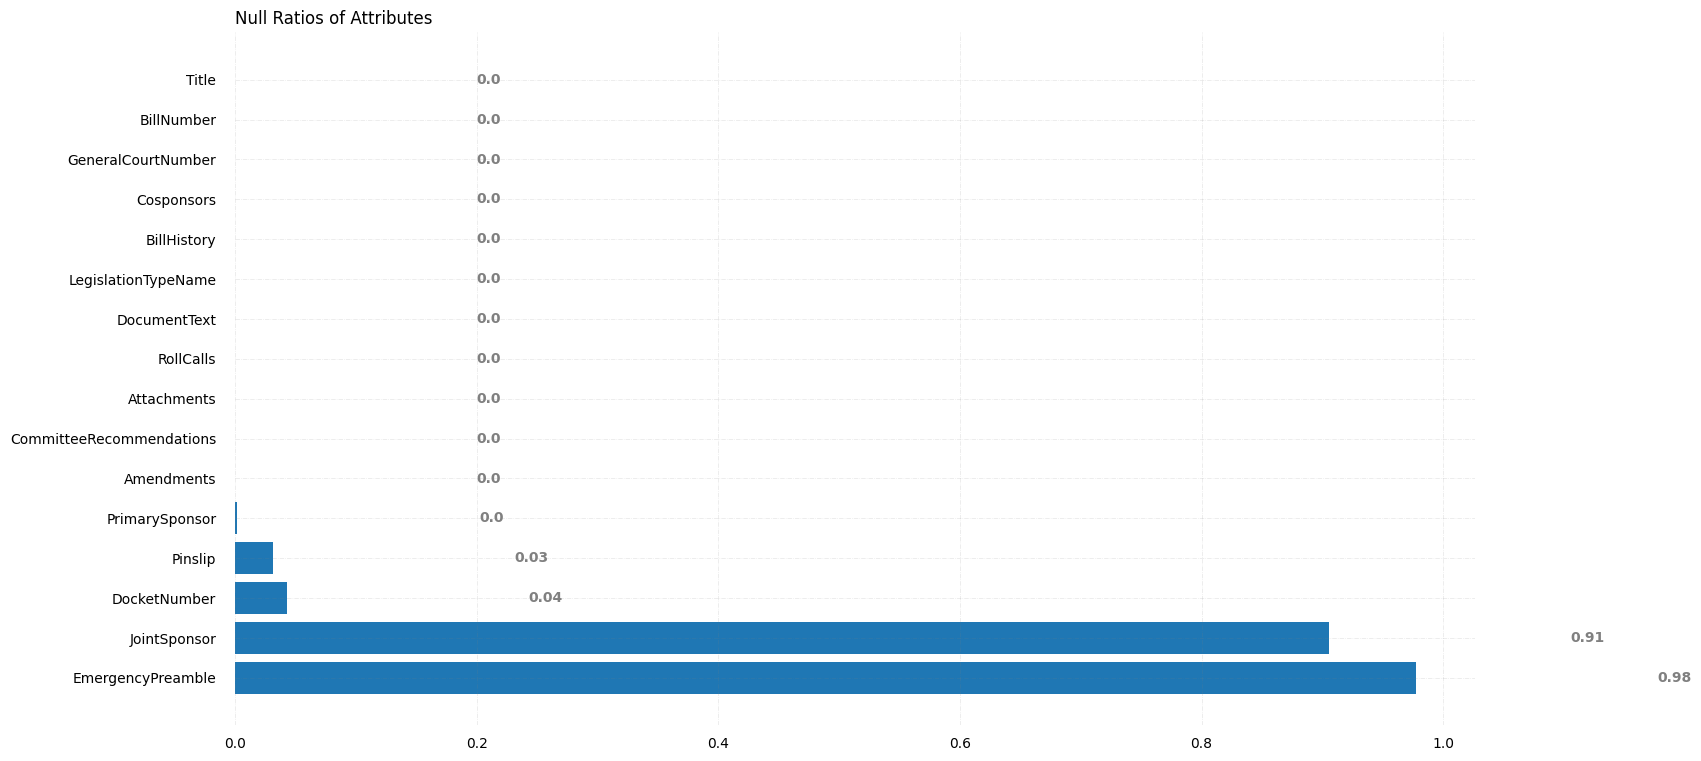

In [157]:
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(null_ratio_list_keys, null_ratio_list_values)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Null Ratios of Attributes',
             loc ='left', )

fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

Null ratios like 90% and above are so high. So we thought we must drop them. 

In [93]:
df_new=df_new.drop(columns=['JointSponsor','EmergencyPreamble'], inplace=False)

We realized that there are different forms of null values in the dataset such as for attributes RollCalls, Amendments, Cosponsors, CommitteeRecommendations, and Attachments the null or empty value is []. So, it would be a good practice to analyize them too. 

In [86]:
df_new.Cosponsors.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [87]:
print(f"For Cosponsors null ratio is {df_new.Cosponsors.value_counts()[0]/num_rows}")

For Cosponsors null ratio is 0.010424103955447666


In [88]:
df_new.CommitteeRecommendations.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [90]:
print(f"For CommitteeRecommendations null ratio is {df_new.CommitteeRecommendations.value_counts()[0]/num_rows}")

For CommitteeRecommendations null ratio is 0.22675996001713553


In [75]:
df_new.RollCalls.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       6985
[{'GeneralCourtNumber': 193, 'Branch': 'Senate', 'RollCallNumber': 101, 'Details': 'http://malegislature.gov/api/GeneralCourts/193/Branches/Senate/RollCalls/101'}]                       

In [77]:
print(f"For RollCalls null ratio is {df_new.RollCalls.value_counts()[0]/num_rows}")

For RollCalls null ratio is 0.9974296729972869


In [78]:
df_new.Amendments.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [94]:
print(f"For Amendments null ratio is {df_new.Amendments.value_counts()[0]/num_rows}")

For Amendments null ratio is 0.983578466371555


In [79]:
df_new.Attachments.value_counts()

[]                                                                                                                                                                                   6877
[{'Description': 'S2487 -- Charlton', 'DownloadUrl': 'http://malegislature.gov/api/DownloadReport?attachmentId=17268&title=S2487%20--%20Charlton'}]                                     1
[{'Description': 'Updated Local approval', 'DownloadUrl': 'http://malegislature.gov/api/DownloadReport?attachmentId=17192&title=Updated%20Local%20approval'}]                           1
[{'Description': 'H3841 -- Deerfield', 'DownloadUrl': 'http://malegislature.gov/api/DownloadReport?attachmentId=16770&title=H3841%20--%20Deerfield'}]                                   1
[{'Description': 'Remove as co-sponsor 2/1/2023', 'DownloadUrl': 'http://malegislature.gov/api/DownloadReport?attachmentId=15095&title=Remove%20as%20co-sponsor%202%2F1%2F2023'}]       1
                                                                      

In [95]:
print(f"For Attachments null ratio is {df_new.Attachments.value_counts()[0]/num_rows}")

For Attachments null ratio is 0.9820077109810081


For RollCalls, Attachments and Amendments , the null ratios are so high. So we are going to drop them too. 

In [96]:
df_new=df_new.drop(columns=['Attachments','Amendments','RollCalls'], inplace=False)

In [97]:
df_new.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,BillHistory,LegislationTypeName,Pinslip,DocumentText,CommitteeRecommendations
1,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
2,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
3,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
4,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
5,An Act relative to children's auditory health,H1002,HD2355,193.0,"{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Typ...","[{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Ty...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Durant of Spencer, a petitio...",\tSECTION 1. Section 23 of chapter 32A of the ...,"[{'Action': 'Accompanied', 'FiscalAmounts': []..."


In [98]:
df_new.shape

(7003, 11)

For the rest of the attributes, we can see the representation of null values by counting the unique elements in each attribute. ASSUMPTION: The representation of null values can not be smaller than any repeating values in the attribute.

In [101]:
len(df_new.Title.value_counts())

5846

In [107]:
df_new.Title.value_counts().keys()[0]

'An Act relative to bereavement leave'

In [122]:
"" or " " in df_new.Title.value_counts().keys()

False

So no nulls for title attribute.

In [99]:
len(df_new.BillNumber.value_counts())

7003

It seems that there are no nulls for this attribute. And each row has a unique element. Son we can treat this as ID attribute.

In [100]:
len(df_new.DocketNumber.value_counts())

6702

In [113]:
df_new.DocketNumber.value_counts().keys()[0]

'SD2081'

In [119]:
"" or " " in df_new.DocketNumber.value_counts().keys()

False

So no nulls for DocketNumber attribute.

In [120]:
df_new.GeneralCourtNumber.value_counts()

193.0    7003
Name: GeneralCourtNumber, dtype: int64

No null values for GeneralCourtNumber attribute. But all them are 193.0 which doesn't add any value or information to the dataset. We may consider to drop this column.

In [123]:
len(df_new.PrimarySponsor.value_counts())

6990

In [124]:
df_new.PrimarySponsor.value_counts().keys()[0]

"{'Id': 'JPL1', 'Name': 'Jack Patrick Lewis', 'Type': 1, 'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/JPL1', 'ResponseDate': '2023-01-18T18:03:03.52'}"

In [ ]:
df_new.PrimarySponsor.value_counts().keys()

In [137]:
sorted(list(filter(lambda x: len(x)<10,df_new.PrimarySponsor.value_counts().keys())))

[]

This shows that there are no nulls for PrimarySponsor attribute.

11

In [145]:
df_new.LegislationTypeName.value_counts()

Bill                                     6745
Resolve                                    82
Extension Order                            61
Order                                      37
Amendment                                  27
Proposal for Constitutional Amendment      24
Resolution                                 20
Governor's Message (Communication)          4
Resolution (Ceremonial)                     1
ReOrg Plan                                  1
Governor's Message (Veto)                   1
Name: LegislationTypeName, dtype: int64

So no null values for LegislationTypeName attribute.

In [146]:
len(df_new.Pinslip.value_counts())

6781

In [148]:
df_new.Pinslip.value_counts().keys()[0]

'Filed by Mr. Galvin of Canton.  January 31, 2023.'

Lastly, no null values for Pinslip attribute. 

In [149]:
df_new.to_csv('bills_cleaned.csv', index=False)

In [150]:
df_new.shape

(7003, 11)